### Threads and Checkpoints in LangGraph

#### Overview

This demo explains how to use **threads** and **checkpoints** in LangGraph workflows. These features enable **persistent conversation tracking** and **state snapshotting**, which are critical for building multi-turn, stateful workflows and agents.

In [1]:
from typing import TypedDict, List, Annotated
import operator
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

#### **Basic Workflow Setup**

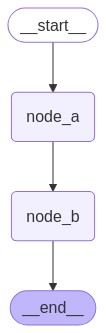

In [2]:
class State(TypedDict):
    value: Annotated[List[str], operator.add]

def node_a(state: State):
    return {"value": ["a"]}

def node_b(state: State):
    return {"value": ["b"]}

workflow = StateGraph(State)

workflow.add_node(node_a)
workflow.add_node(node_b)

workflow.add_edge(START, "node_a")
workflow.add_edge("node_a", "node_b")
workflow.add_edge("node_b", END)

graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [4]:
graph.invoke({"value":[]})

{'value': ['a', 'b']}

#### **Adding Checkpoints**

In [5]:
checkpointer = MemorySaver()
graph = workflow.compile(checkpointer=checkpointer)

In [6]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

In [7]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b', 'a', 'b']}

In [8]:
config = {"configurable": {"thread_id": "2"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

In [9]:
config = {"configurable": {"thread_id": "3"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

#### **Viewing State History**

In [10]:
list(graph.get_state_history({"configurable": {"thread_id": "1"}}))

[StateSnapshot(values={'value': ['a', 'b', 'a', 'b']}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f02a9e6-a724-6b5e-8006-3fb82b6cc6ab'}}, metadata={'source': 'loop', 'writes': {'node_b': {'value': ['b']}}, 'step': 6, 'parents': {}}, created_at='2025-05-06T17:20:32.755995+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f02a9e6-a723-6182-8005-b478af26cd7b'}}, tasks=()),
 StateSnapshot(values={'value': ['a', 'b', 'a']}, next=('node_b',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f02a9e6-a723-6182-8005-b478af26cd7b'}}, metadata={'source': 'loop', 'writes': {'node_a': {'value': ['a']}}, 'step': 5, 'parents': {}}, created_at='2025-05-06T17:20:32.755332+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f02a9e6-a720-6fcc-8004-66224cc9e39e'}}, tasks=(PregelTask(id='d5389196-8fde-9c92-895c-c15591bdd4dc', name='

In [11]:
list(graph.get_state_history({"configurable": {"thread_id": "2"}}))

[StateSnapshot(values={'value': ['a', 'b']}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f02a9e6-b8fd-6c9a-8002-3d6edde3002b'}}, metadata={'source': 'loop', 'writes': {'node_b': {'value': ['b']}}, 'step': 2, 'parents': {}}, created_at='2025-05-06T17:20:34.627488+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f02a9e6-b8fc-6322-8001-1f6b03dc73a3'}}, tasks=()),
 StateSnapshot(values={'value': ['a']}, next=('node_b',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f02a9e6-b8fc-6322-8001-1f6b03dc73a3'}}, metadata={'source': 'loop', 'writes': {'node_a': {'value': ['a']}}, 'step': 1, 'parents': {}}, created_at='2025-05-06T17:20:34.626837+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f02a9e6-b8f9-6db6-8000-d6b2ede93f04'}}, tasks=(PregelTask(id='2be7c01c-7c66-0e25-96e8-97353c69e137', name='node_b', error=None,

#### **Conclusion**

- Threads and checkpoints are foundational for building **persistent**, **multi-turn**, and **recoverable** workflows.
- LangGraph’s checkpointer mechanism enables lightweight memory without needing external databases.
- This system is scalable to more complex workflows involving LLMs, agents, and external data integrations.